In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Real estate.csv")

In [3]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [5]:
df = df.drop(['No','X5 latitude','X6 longitude'],axis=1)

In [6]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5


In [7]:
df= df.rename(columns = {"X1 transaction date":"transaction_date", 
                         "X2 house age": "house_age",
                         "X3 distance to the nearest MRT station": "distance_MRT_station",
                         "X4 number of convenience stores":"num_conv_stores",
                         "Y house price of unit area":"price_perunit_area" })
df

,transaction_date,house_age,distance_MRT_station,num_conv_stores,price_perunit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5


In [8]:
df.dtypes

transaction_date        float64
house_age               float64
distance_MRT_station    float64
num_conv_stores           int64
price_perunit_area      float64
dtype: object

In [9]:
year_mon = df['transaction_date'].apply(lambda x:str(x).split(".")) 
years = [int(year[0]) for year in year_mon] 
months = [int(year[1]) for year in year_mon] 
df['transaction_year'] = years
df['transaction_month'] = months
df

,transaction_date,house_age,distance_MRT_station,num_conv_stores,price_perunit_area,transaction_year,transaction_month
0,2012.917,32.0,84.87882,10,37.9,2012,917
1,2012.917,19.5,306.59470,9,42.2,2012,917
2,2013.583,13.3,561.98450,5,47.3,2013,583
3,2013.500,13.3,561.98450,5,54.8,2013,5
4,2012.833,5.0,390.56840,5,43.1,2012,833
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4,2013,0
410,2012.667,5.6,90.45606,9,50.0,2012,667
411,2013.250,18.8,390.96960,7,40.6,2013,25
412,2013.000,8.1,104.81010,5,52.5,2013,0


In [10]:
df = df.drop(['transaction_date', "transaction_month"],axis=1)
df.head()

,house_age,distance_MRT_station,num_conv_stores,price_perunit_area,transaction_year
0,32.0,84.87882,10,37.9,2012
1,19.5,306.59470,9,42.2,2012
2,13.3,561.98450,5,47.3,2013
3,13.3,561.98450,5,54.8,2013
4,5.0,390.56840,5,43.1,2012


<AxesSubplot:>

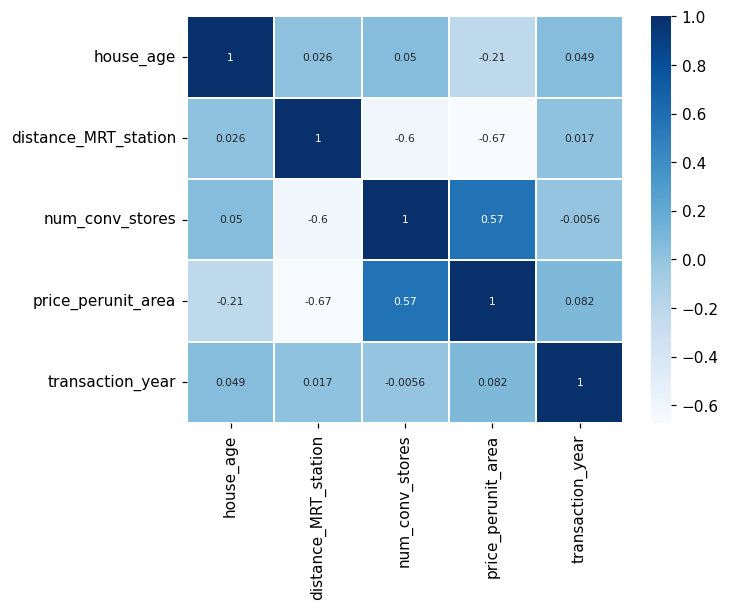

In [11]:
plt.figure(dpi=110)
sns.heatmap(df.corr(), linewidths=1,cmap="Blues",annot=True, annot_kws={'size':7})

<AxesSubplot:xlabel='price_perunit_area', ylabel='Count'>

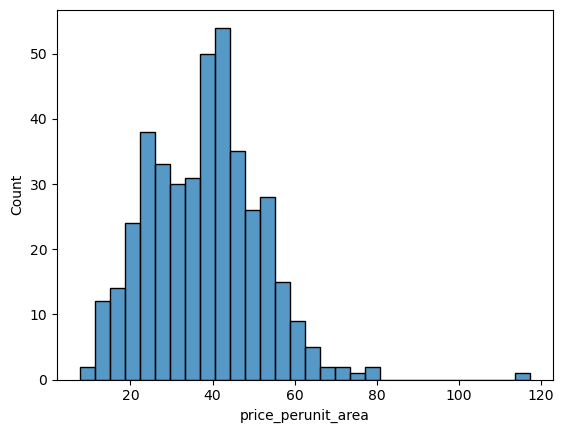

In [12]:
sns.histplot(df['price_perunit_area'],bins=30)

<AxesSubplot:xlabel='distance_MRT_station', ylabel='price_perunit_area'>

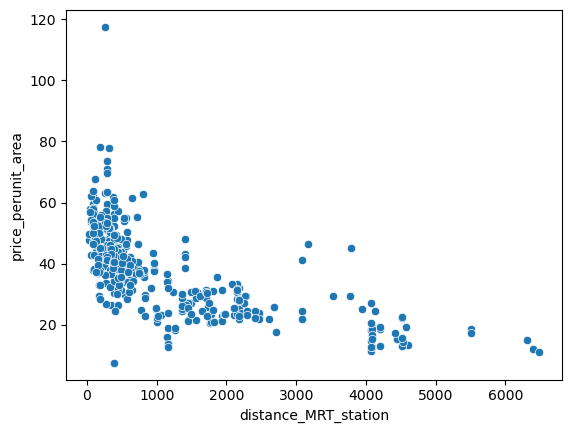

In [13]:
sns.scatterplot(data = df, x = 'distance_MRT_station', y = 'price_perunit_area' )

<AxesSubplot:xlabel='transaction_year', ylabel='price_perunit_area'>

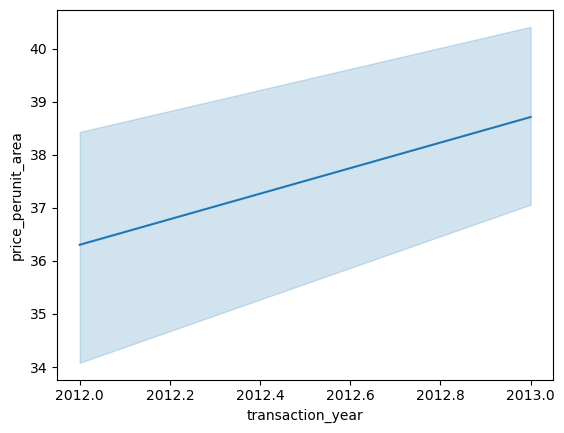

In [14]:
sns.lineplot(x=df['transaction_year'],y=df['price_perunit_area'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transaction_year', ylabel='price_perunit_area'>

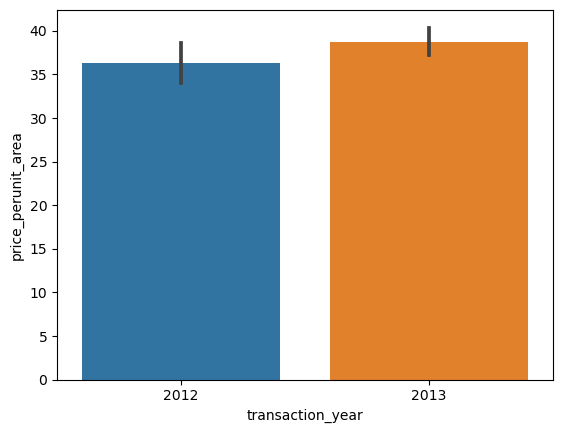

In [15]:
sns.barplot( df['transaction_year'],df['price_perunit_area'])

<AxesSubplot:xlabel='house_age', ylabel='price_perunit_area'>

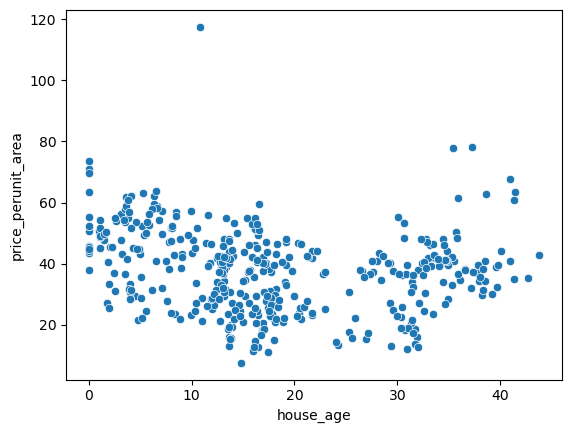

In [16]:
sns.scatterplot(data = df, x = 'house_age', y = 'price_perunit_area' )

In [17]:
df[(df['price_perunit_area'] >100) & (df['house_age']<20)]


,house_age,distance_MRT_station,num_conv_stores,price_perunit_area,transaction_year
270,10.8,252.5822,1,117.5,2013


In [18]:
df.describe()

,house_age,distance_MRT_station,num_conv_stores,price_perunit_area,transaction_year
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,37.980193,2012.695652
std,11.392485,1262.109595,2.945562,13.606488,0.460687
min,0.000000,23.382840,0.000000,7.600000,2012.000000
25%,9.025000,289.324800,1.000000,27.700000,2012.000000
50%,16.100000,492.231300,4.000000,38.450000,2013.000000
75%,28.150000,1454.279000,6.000000,46.600000,2013.000000
max,43.800000,6488.021000,10.000000,117.500000,2013.000000


In [19]:
df = df.drop(270)

In [20]:
x = df.drop('price_perunit_area',axis=1)
y = df['price_perunit_area']

In [21]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

poly_feat = PolynomialFeatures(degree=2)
x_poly = poly_feat.fit_transform(x)
x_poly.shape

(413, 15)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.3,random_state=264)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [26]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [27]:
linear_mae = mean_absolute_error(y_test,y_pred)
print(linear_mae)

linear_rmse = np.sqrt(mean_squared_error(y_test,y_pred))          
print(linear_rmse)

linear_r2 = r2_score(y_test,y_pred)
print(linear_r2)

5.624317067537324
7.609096448859547
0.6429735713590145


In [28]:
print("intercept : ",lr.intercept_)

intercept :  38.39307958477698


In [29]:
from joblib import load,dump
dump(lr,'lr_Model.joblib') 
dump(poly_feat,'poly_conv.joblib')  
dump(scaler, 'std_scaler.joblib') 

['std_scaler.joblib']

In [30]:
lr_loaded = load("lr_Model.joblib")
poly_conv_loaded = load("poly_conv.joblib")
scaler_loaded = load("std_scaler.joblib")

In [31]:
user_inp = [8,572.9850, 9, 2013]

converted = poly_conv_loaded.fit_transform([user_inp]) 
scaled = scaler_loaded.transform(converted) 

prediction = lr_loaded.predict(scaled) 

print("The Price of House is around",prediction[0],"New Taiwan dollars per unit area")

The Price of House is around 44.01919120554444 New Taiwan dollars per unit area
